## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
rows_no = df.shape[0]

print("The number of rows in the dataset = ", rows_no)

The number of rows in the dataset =  294478


c. The number of unique users in the dataset.

In [4]:
unique_ids = df.nunique()['user_id']

print("The number of unique users in the dataset = ", unique_ids)

The number of unique users in the dataset =  290584


d. The proportion of users converted.

In [5]:
conv_prop = df['converted'].mean()

print("The proportion of users converted = ", conv_prop)

The proportion of users converted =  0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
total_len = len(df.query('group == "control" & landing_page != "old_page"')) + len(df.query('group == "treatment" & landing_page == "old_page"'))

print("The number of times the new_page and treatment don't match = " , total_len)

The number of times the new_page and treatment don't match =  3893


f. Do any of the rows have missing values?

In [7]:
df.info()
print("\n\nSince the RangeIndex == 294478, and the number of rows in each columns = 294478 (the same number) -->\nThere is no row has missing values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Since the RangeIndex == 294478, and the number of rows in each columns = 294478 (the same number) -->
There is no row has missing values


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('(group == "treatment" & landing_page =="new_page") | (group == "control" & landing_page =="old_page")')
df2.shape

(290585, 5)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
unique_ids2 = df2.nunique()['user_id']

print("The number of unique users in the dataset2 = ", unique_ids2)

The number of unique users in the dataset2 =  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id'].index

Int64Index([1899, 2893], dtype='int64')

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(['user_id'], inplace=True)
df2.shape

<ipython-input-13-311132cc0711>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(['user_id'], inplace=True)


(290584, 5)

In [14]:
#to make sure that the duplicated row have been dropped
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#to know the name of columns
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


In [16]:
print("The Probability of an individual converting regardless of the page they receive?" , 
      df2['converted'].mean())

The Probability of an individual converting regardless of the page they receive? 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
p_control_converted = df2.query('group == "control"')['converted'].mean() 
print("If an individual was in the control group, the probability they converted is : ", 
    p_control_converted)

If an individual was in the control group, the probability they converted is :  0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
p_treatment_converted = df2.query('group == "treatment"')['converted'].mean()
print("If an individual was in the treatment group, the probability they converted = ", 
    p_treatment_converted)

If an individual was in the treatment group, the probability they converted =  0.11880806551510564


d. What is the probability that an individual received the new page?

In [19]:
print("The probability that an individual received the new page = ",
    df2.query("landing_page == 'new_page'").shape[0]/df2.shape[0])

The probability that an individual received the new page =  0.5000619442226688


In [20]:
obs_diff = p_treatment_converted - p_control_converted
obs_diff

-0.0015782389853555567

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**No there is no sufficient evidence to conclude that the new treatment page leads to more conversions, because the difference between the new treatment conversions and control conversions is very small = -0.00157**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ : $p_{new}$ <= **$p_{old}$** <br>
$H_{a}$ : $p_{new}$ > **$p_{old}$** <br>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
#The conversion rate for  𝑝𝑛𝑒𝑤  under the null
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
#The conversion rate for  𝑝old under the null
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
# The  𝑛𝑛𝑒𝑤 , the number of individuals in the treatment group
n_new = len(df2.query('group == "treatment"'))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
# The 𝑛𝑜𝑙𝑑 , the number of individuals in the control group
n_old = len(df2.query('group == "control"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#The Simulated  𝑛𝑛𝑒𝑤  transactions with a conversion rate of  𝑝𝑛𝑒𝑤  under the null
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#The Simulated  𝑛𝑜𝑙𝑑  transactions with a conversion rate of  𝑝𝑜𝑙𝑑  under the null.
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# The diff between new_page_converted & old_page_converted
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.0005802103450612828

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
#Create 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  values using the same simulation process you used in parts (a) through (g) above
p_diffs = []

#Using numpy built-in operations over explicit for loops because it is more computationally efficient 
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

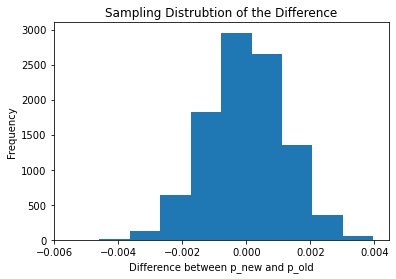

In [29]:
#Plot a histogram of the p_diffs
plt.hist(p_diffs)
plt.xlabel("Difference between p_new and p_old")
plt.ylabel("Frequency")
plt.title("Sampling Distrubtion of the Difference");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

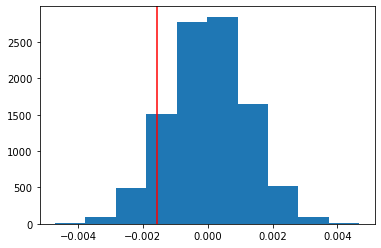

In [30]:
#To see proportion of the p_diffs are greater than the actual difference observed in ab_data.csv visially
#convert p_diffs to numpy array to use the np functions
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals);
plt.axvline(obs_diff, color='r');

In [31]:
#The proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
print('The Actual Difference = ', obs_diff)
print("The  proportion of the p_diffs are greater than the actual difference observed = ", (null_vals > obs_diff).mean())

The Actual Difference =  -0.0015782389853555567
The  proportion of the p_diffs are greater than the actual difference observed =  0.9043


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**I have computed the p-value, which is the probability of observing our statistic (the obs_diff) if the null hypothesis is true, and the p-value was 0.90 = 90% which is greater than the threshold = 5% --> p-value > 5% --> we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
#Prepare the variable to use the bulit-in
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query('group == "control"'))
n_new = len(df2.query('group == "treatment"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
#import proportions_ztest to get the z_score, and the p-val
from statsmodels.stats.proportion import proportions_ztest
z_score, pval = proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old], alternative='larger')
print("z-score = ", z_score)
print("P-Value = ", pval)

z-score =  -1.3109241984234394
P-Value =  0.9050583127590245


In [34]:
from scipy.stats import norm
# p = 1 - alpha = 1- 0.05 = 0.95
p = 0.95
# retrieve value <= probability
# norm.ppf -> Tells us what our critical value at 95% confidence is
value = norm.ppf(p)
print(value)

1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The test statistic < critical value (-1.31 < 1.6448 ) and the p-value that > threshold mean that we fail to reject the null hypothesis, which mean the new treatment page does not lead to more conversions compared of the old control page**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<b>Since we have two value either a conversion or no conversion, then the suitable type of regression is the <i style='color:red'> Logistic Regression</i></b>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
#to know the columns and how the values is written
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


In [36]:
#Specify X, and y values to be ready to enter to the model
df2['intercept'] = 1
y = df2['converted']
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

X = df2[['intercept', 'ab_page']]
df2.head(1)

<ipython-input-36-cf491015558f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1
<ipython-input-36-cf491015558f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [37]:
#fit the model
logit_mod = sm.Logit(y, X)
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
#Extract the summary to understand the relationship between ab_page and the converted 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 01 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        17:07:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value that associated with ab-page = 0.190 which is lower than what we found in part 2 which was = 0.90, and that because the null and alternative hypotheses here is different than what in partII**

**The logistic regression gives only two possible outcomes. If the new page is equal to the old page or not equal to.**
$$H_0: p_{new} - p_{old} = 0$$
$$H_1: p_{new} - p_{old} != 0$$

**and the other reason that part III is two sided (two-tailed) test and Part II is a one sided test (one-tailed)**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The Advantage of consider other factors to add into the regression model**
<ul>
    <li>The ability to determine the relative influence of one or more predictor variables to the criterion value.</li>
    <li>The ability to identify outliers, or anomalies.</li>
</ul>

**The DisAdvantage of consider other factors to add into the regression model**<br>
Any disadvantage of using a multiple regression model usually comes down to the data being used. Two examples of this are using incomplete data and falsely concluding that a correlation is a causation

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
#read countries data and join it with df2
countries_df = pd.read_csv('countries.csv')
total_df = countries_df.set_index('user_id').join(df2.set_index('user_id'))
total_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
#to know the countries name to make dummies
countries_name = total_df.country.value_counts().index
countries_name

Index(['US', 'UK', 'CA'], dtype='object')

In [41]:
#Get dummies from countires column
total_df[['CA', 'UK', 'US']] = pd.get_dummies(total_df['country'])
total_df.head(1)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0


In [42]:
#Specify the X, and y to apply the Logistic Regression model on it
total_df['intercept'] = 1
y = total_df['converted']
X = total_df[['intercept', 'US', 'UK', 'ab_page']]

In [43]:
#fit the model, and extract the summary
logit_mod = sm.Logit(y, X)
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 01 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        17:07:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
#Add those columns to see the interaction between page and country to see if there significant effects on conversion
total_df['US_new'] = total_df['US'] * total_df['ab_page']
total_df['UK_new'] = total_df['UK'] * total_df['ab_page']

In [45]:
#Specify the X, and y to apply the Logistic Regression model on it
X = total_df[['intercept', 'US', 'UK', 'ab_page', 'US_new', 'UK_new']]
y = total_df['converted']

#fit the model, and extract the summary
logit_mod = sm.Logit(y, X)
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 01 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        17:07:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_new         0.0469      0.054      0.872      0.383      -0.059       0.152
UK_new         0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

In [46]:
#Get the exp to interpret the positive coef
np.exp(results.params)

intercept    0.134794
US           1.017682
UK           1.011854
ab_page      0.934776
US_new       1.048001
UK_new       1.081428
dtype: float64

In [47]:
#Get the 1 / exp to interpret the negative coef
1/(np.exp(results.params))

intercept    7.418713
US           0.982625
UK           0.988285
ab_page      1.069775
US_new       0.954198
UK_new       0.924703
dtype: float64

### Conclusions
1. Converted is 1.02 times as likely on US Than CA holding all else constant.
2. Converted is 1.01 times as likely on UK Than CA holding all else constant.
3. Converted is 1.06 times as likely on Treatment than Control holding all else constant.
4. For each 1 unit increase in US_new, Converted is 1.04 times as likely holding all else constant
5. For each 1 unit increase in UK_new, Converted is 1.08 times as likely holding all else constant
5. The p-values do not provide a statistical basis to reject the null hypothesis and not significant, based on a Type I error rate of 5%.

**We recommend the company to continue using old page**